# Test 2 : compare no sigmut, not normalized sigmut and normalized sigmut
Here, we compare, for GCN classifier with Tumour type pre-graph, the case where we use no mutational signatures, not normalized mutational slignatures, and normalized mutational signatures.

## Table of contents

1. [No sigmut](#1-no-sigmut)
2. [Not normalized sigmut](#2-not-normalized-sigmut)
3. [Normalized sigmut](#3-normalized-sigmut)
4. [Evaluate performances](#4-performances)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from evaluation.ClassificationMetrics import ClassificationMetrics

from manage.GCNClassifierTrainTestManager import GCNClassifierTrainTestManager

from models.GCNClassifier import GCNClassifier

from sklearn.preprocessing import StandardScaler

from utils.preProcessing import preProcessing

## 1. No mutational signatures

In [2]:
# Reading
df_no_sigmut = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_no_sigmut = df_no_sigmut.loc[df_no_sigmut["Cohort"] == "Naive"]

# Drop NaN values
df_no_sigmut = preProcessing.delete_nan_values(df_no_sigmut)

# Drop censored patients (OS)
t = np.median(df_no_sigmut["Overall survival (days)"].to_numpy())
df_no_sigmut = preProcessing.drop_censored_patients(df_no_sigmut, "Alive_0","Overall survival (days)",t)

# Extract features and label
features_name_no_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]
label_name = "Clinical benefit"
X_no_sigmut = df_no_sigmut.loc[:,features_name_no_sigmut].to_numpy()
y_no_sigmut = np.where(df_no_sigmut[label_name]=="DCB",1,0)

# Normalize features
X_no_sigmut = preProcessing.normalize_data(X_no_sigmut)

1 patients censored deleted


In [3]:
# Build group (all in same group)
group_no_sigmut = df_no_sigmut["Tumour type"].to_numpy()

In [4]:
# Instanciate GCN classifier with its train test manager
gcn_clf_no_sigmut = GCNClassifier(len(features_name_no_sigmut))
gcn_manager_no_sigmut = GCNClassifierTrainTestManager(gcn_clf_no_sigmut)
n_epochs = 50

In [5]:
# Make the leave one out cross validation
scores_no_sigmut, classes_no_sigmut, train_loss_no_sigmut, val_loss_no_sigmut, std_train_loss_no_sigmut, std_val_loss_no_sigmut, params_conv_no_sigmut, params_fc_no_sigmut = gcn_manager_no_sigmut.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut, n_epochs, "euclidean",3)

## 2. Not normalized mutational signatures

In [6]:
# Reading
df_sigmut = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_sigmut = df_sigmut.loc[df_sigmut["Cohort"] == "Naive"]

# Drop NaN values
df_sigmut = preProcessing.delete_nan_values(df_sigmut)

# Drop censored patients (OS)
t = np.median(df_sigmut["Overall survival (days)"].to_numpy())
df_sigmut = preProcessing.drop_censored_patients(df_sigmut, "Alive_0","Overall survival (days)",t)

# Select features
features_name_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]
features_to_normalize = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]

# Normalize features except mutational signatures
df_sigmut.loc[:,features_to_normalize] = StandardScaler().fit_transform(df_sigmut.loc[:,features_to_normalize].to_numpy())

# Extract features
X_sigmut_not_normalized = df_sigmut.loc[:,features_name_sigmut].to_numpy()

# Numerize label
y_sigmut = np.where(df_sigmut[label_name]=="DCB",1,0)

1 patients censored deleted


In [7]:
# Build group (all in same group)
group_sigmut = df_sigmut["Tumour type"].to_numpy()

In [8]:
# Instanciate GCN classifier with its train test manager
gcn_clf_sigmut_not_normalized = GCNClassifier(len(features_name_sigmut))
gcn_manager_sigmut_not_normalized = GCNClassifierTrainTestManager(gcn_clf_sigmut_not_normalized)

In [9]:
# Make the leave one out cross validation
scores_sigmut_not_normalized, classes_sigmut_not_normalized, train_loss_sigmut_not_normalized, val_loss_sigmut_not_normalized, std_train_loss_sigmut_not_normalized, std_val_loss_sigmut_not_normalized, params_conv_sigmut_not_normalized, params_fc_sigmut_not_normalized = gcn_manager_sigmut_not_normalized.leave_one_out_cross_validation(X_sigmut_not_normalized, y_sigmut, group_sigmut, n_epochs, "euclidean",3)

## 3. Normalized mutational signatures

In [10]:
# Reading
df_sigmut = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_sigmut = df_sigmut.loc[df_sigmut["Cohort"] == "Naive"]

# Drop NaN values
df_sigmut = preProcessing.delete_nan_values(df_sigmut)

# Drop censored patients (OS)
t = np.median(df_sigmut["Overall survival (days)"].to_numpy())
df_sigmut = preProcessing.drop_censored_patients(df_sigmut, "Alive_0","Overall survival (days)",t)

# Select features
features_name_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]

# Normalize features except mutational signatures
df_sigmut.loc[:,features_name_sigmut] = StandardScaler().fit_transform(df_sigmut.loc[:,features_name_sigmut].to_numpy())

# Extract features
X_sigmut_normalized = df_sigmut.loc[:,features_name_sigmut].to_numpy()

# Numerize label
y_sigmut = np.where(df_sigmut[label_name]=="DCB",1,0)

1 patients censored deleted


In [11]:
# Build group (all in same group)
group_sigmut = df_sigmut["Tumour type"].to_numpy()

In [12]:
# Instanciate GCN classifier with its train test manager
gcn_clf_sigmut_normalized = GCNClassifier(len(features_name_sigmut))
gcn_manager_sigmut_normalized = GCNClassifierTrainTestManager(gcn_clf_sigmut_normalized)

In [13]:
# Make the leave one out cross validation
scores_sigmut_normalized, classes_sigmut_normalized, train_loss_sigmut_normalized, val_loss_sigmut_normalized, std_train_loss_sigmut_normalized, std_val_loss_sigmut_normalized, params_conv_sigmut_normalized, params_fc_sigmut_normalized = gcn_manager_sigmut_normalized.leave_one_out_cross_validation(X_sigmut_normalized, y_sigmut, group_sigmut, n_epochs, "euclidean",3)

## 4. Evaluate performances

### Precision, recall, F1-score

In [14]:
# No sigmut
pre_no_sigmut, rec_no_sigmut, f1_no_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, classes_no_sigmut)

# Sigmut not normalized
pre_sigmut_not_normalized, rec_sigmut_not_normalized, f1_sigmut_not_normalized = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, classes_sigmut_not_normalized)

# Sigmut normalized
pre_sigmut_normalized, rec_sigmut_normalized, f1_sigmut_normalized = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, classes_sigmut_normalized)

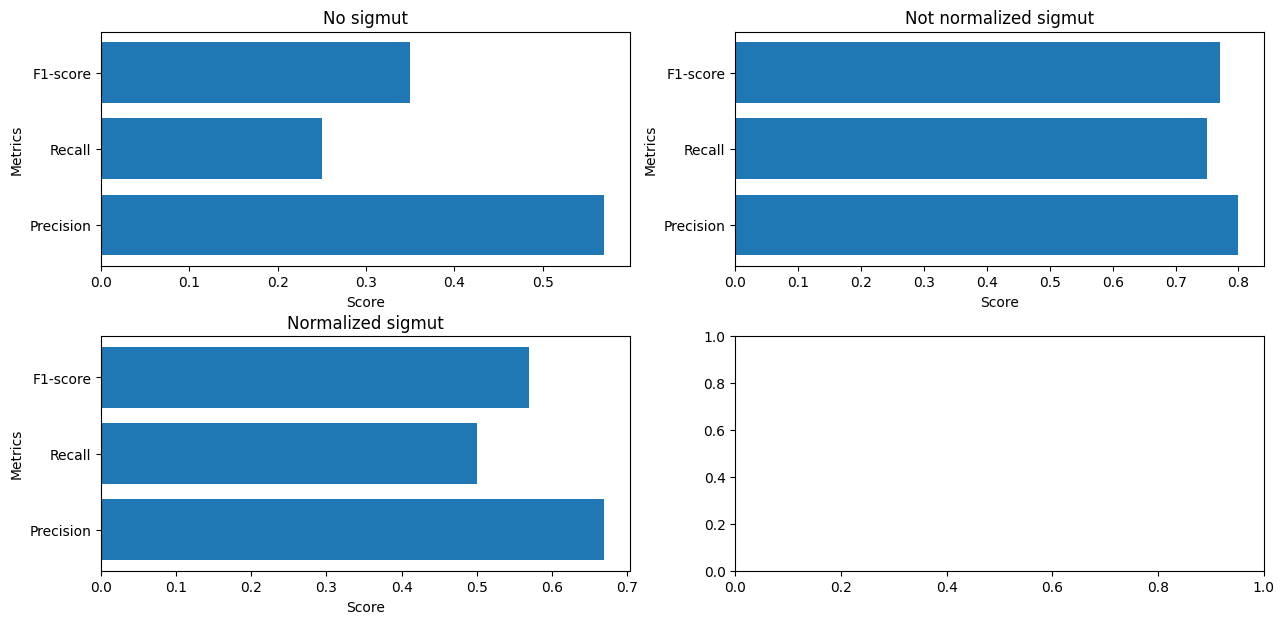

In [15]:
fig, ax = plt.subplots(2,2,figsize=(15,7))

ax[0,0].barh(["Precision","Recall","F1-score"],[pre_no_sigmut, rec_no_sigmut, f1_no_sigmut])
ax[0,0].set_xlabel("Score")
ax[0,0].set_ylabel("Metrics")
ax[0,0].set_title("No sigmut")

ax[0,1].barh(["Precision","Recall","F1-score"],[pre_sigmut_not_normalized, rec_sigmut_not_normalized, f1_sigmut_not_normalized])
ax[0,1].set_xlabel("Score")
ax[0,1].set_ylabel("Metrics")
ax[0,1].set_title("Not normalized sigmut")

ax[1,0].barh(["Precision","Recall","F1-score"],[pre_sigmut_normalized, rec_sigmut_normalized, f1_sigmut_normalized])
ax[1,0].set_xlabel("Score")
ax[1,0].set_ylabel("Metrics")
ax[1,0].set_title("Normalized sigmut")

plt.subplots_adjust(hspace=0.3)

### ROC curve and AUC

In [16]:
# No sigmut
fpr_no_sigmut, tpr_no_sigmut, thresholds_no_sigmut = ClassificationMetrics.compute_roc_curve(y_no_sigmut, scores_no_sigmut)
auc_no_sigmut = ClassificationMetrics.compute_auc(y_no_sigmut, scores_no_sigmut)

# Sigmut not normalized
fpr_sigmut_not_normalized, tpr_sigmut_not_normalized, thresholds_sigmut_not_normalized = ClassificationMetrics.compute_roc_curve(y_sigmut, scores_sigmut_not_normalized)
auc_sigmut_not_normalized = ClassificationMetrics.compute_auc(y_sigmut, scores_sigmut_not_normalized)

# Sigmut not normalized
fpr_sigmut_normalized, tpr_sigmut_normalized, thresholds_sigmut_normalized = ClassificationMetrics.compute_roc_curve(y_sigmut, scores_sigmut_normalized)
auc_sigmut_normalized = ClassificationMetrics.compute_auc(y_sigmut, scores_sigmut_normalized)

Text(0, 0.6, 'AUC sigmut normalized : 0.92')

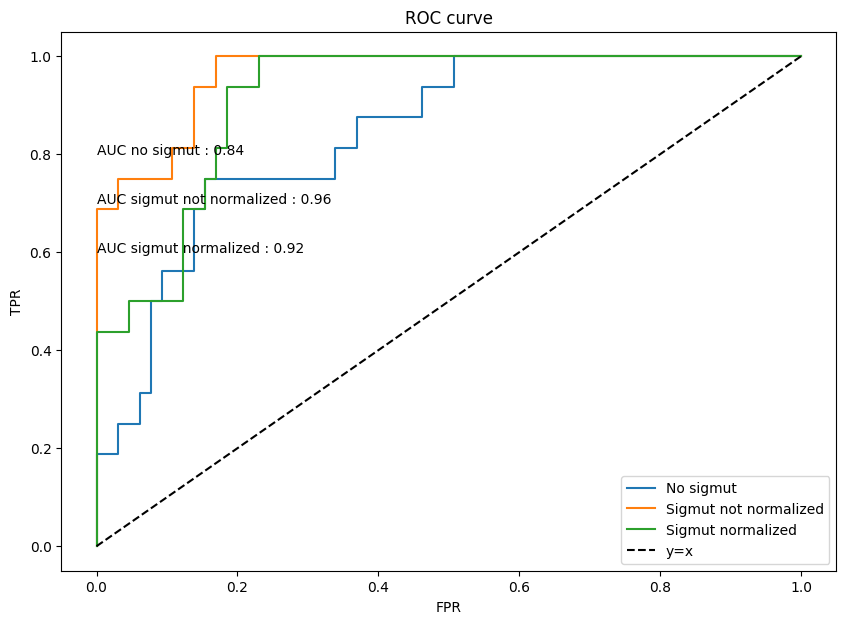

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
x = np.linspace(0,1,100)

ax.plot(fpr_no_sigmut, tpr_no_sigmut, label='No sigmut')
ax.plot(fpr_sigmut_not_normalized, tpr_sigmut_not_normalized, label='Sigmut not normalized')
ax.plot(fpr_sigmut_normalized, tpr_sigmut_normalized, label='Sigmut normalized')
ax.plot(x,x,linestyle='--',color='black',label='y=x')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve')
ax.legend()
ax.text(0,0.8,f"AUC no sigmut : {auc_no_sigmut}")
ax.text(0,0.7,f"AUC sigmut not normalized : {auc_sigmut_not_normalized}")
ax.text(0,0.6,f"AUC sigmut normalized : {auc_sigmut_normalized}")

### Train loss and validation loss

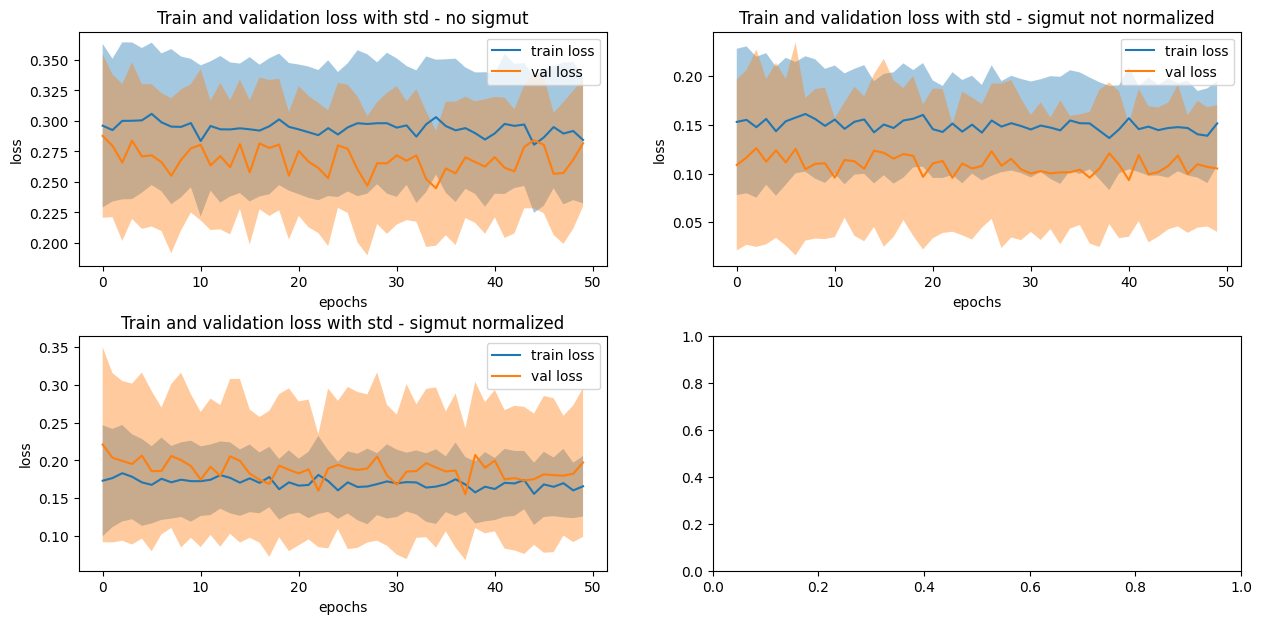

In [18]:
epochs = [k for k in range(n_epochs)]

fig, ax = plt.subplots(2,2,figsize=(15,7))

# No sigmut :
ax[0,0].plot(epochs, train_loss_no_sigmut,label='train loss')
ax[0,0].fill_between(epochs, train_loss_no_sigmut-std_train_loss_no_sigmut, train_loss_no_sigmut+std_train_loss_no_sigmut, alpha=0.4)
ax[0,0].plot(epochs, val_loss_no_sigmut,label='val loss')
ax[0,0].fill_between(epochs, val_loss_no_sigmut-std_train_loss_no_sigmut, val_loss_no_sigmut+std_train_loss_no_sigmut,alpha=0.4)
ax[0,0].set_xlabel('epochs')
ax[0,0].set_ylabel('loss')
ax[0,0].set_title('Train and validation loss with std - no sigmut')
ax[0,0].legend()

# Sigmut not normalized :
ax[0,1].plot(epochs, train_loss_sigmut_not_normalized, label='train loss')
ax[0,1].fill_between(epochs, train_loss_sigmut_not_normalized-std_train_loss_sigmut_not_normalized, train_loss_sigmut_not_normalized+std_train_loss_sigmut_not_normalized, alpha=0.4)
ax[0,1].plot(epochs, val_loss_sigmut_not_normalized,label='val loss')
ax[0,1].fill_between(epochs, val_loss_sigmut_not_normalized-std_val_loss_sigmut_not_normalized, val_loss_sigmut_not_normalized+std_val_loss_sigmut_not_normalized,alpha=0.4)
ax[0,1].set_xlabel('epochs')
ax[0,1].set_ylabel('loss')
ax[0,1].set_title('Train and validation loss with std - sigmut not normalized')
ax[0,1].legend()

# Sigmut not normalized :
ax[1,0].plot(epochs, train_loss_sigmut_normalized, label='train loss')
ax[1,0].fill_between(epochs, train_loss_sigmut_normalized-std_train_loss_sigmut_normalized, train_loss_sigmut_normalized+std_train_loss_sigmut_normalized, alpha=0.4)
ax[1,0].plot(epochs, val_loss_sigmut_normalized,label='val loss')
ax[1,0].fill_between(epochs, val_loss_sigmut_normalized-std_val_loss_sigmut_normalized, val_loss_sigmut_normalized+std_val_loss_sigmut_normalized,alpha=0.4)
ax[1,0].set_xlabel('epochs')
ax[1,0].set_ylabel('loss')
ax[1,0].set_title('Train and validation loss with std - sigmut normalized')
ax[1,0].legend()

plt.subplots_adjust(hspace=0.3)

### Plot weights (not normalized sigmut)

In [19]:
# Take the absolute value
weights_conv = np.absolute(np.mean(params_conv_sigmut_not_normalized[0].detach().numpy(),axis=1))
weights_linear = np.absolute(params_fc_sigmut_not_normalized[0].detach().numpy())[0]

Text(0.5, 1.0, 'FC weights - sigmut not normalized')

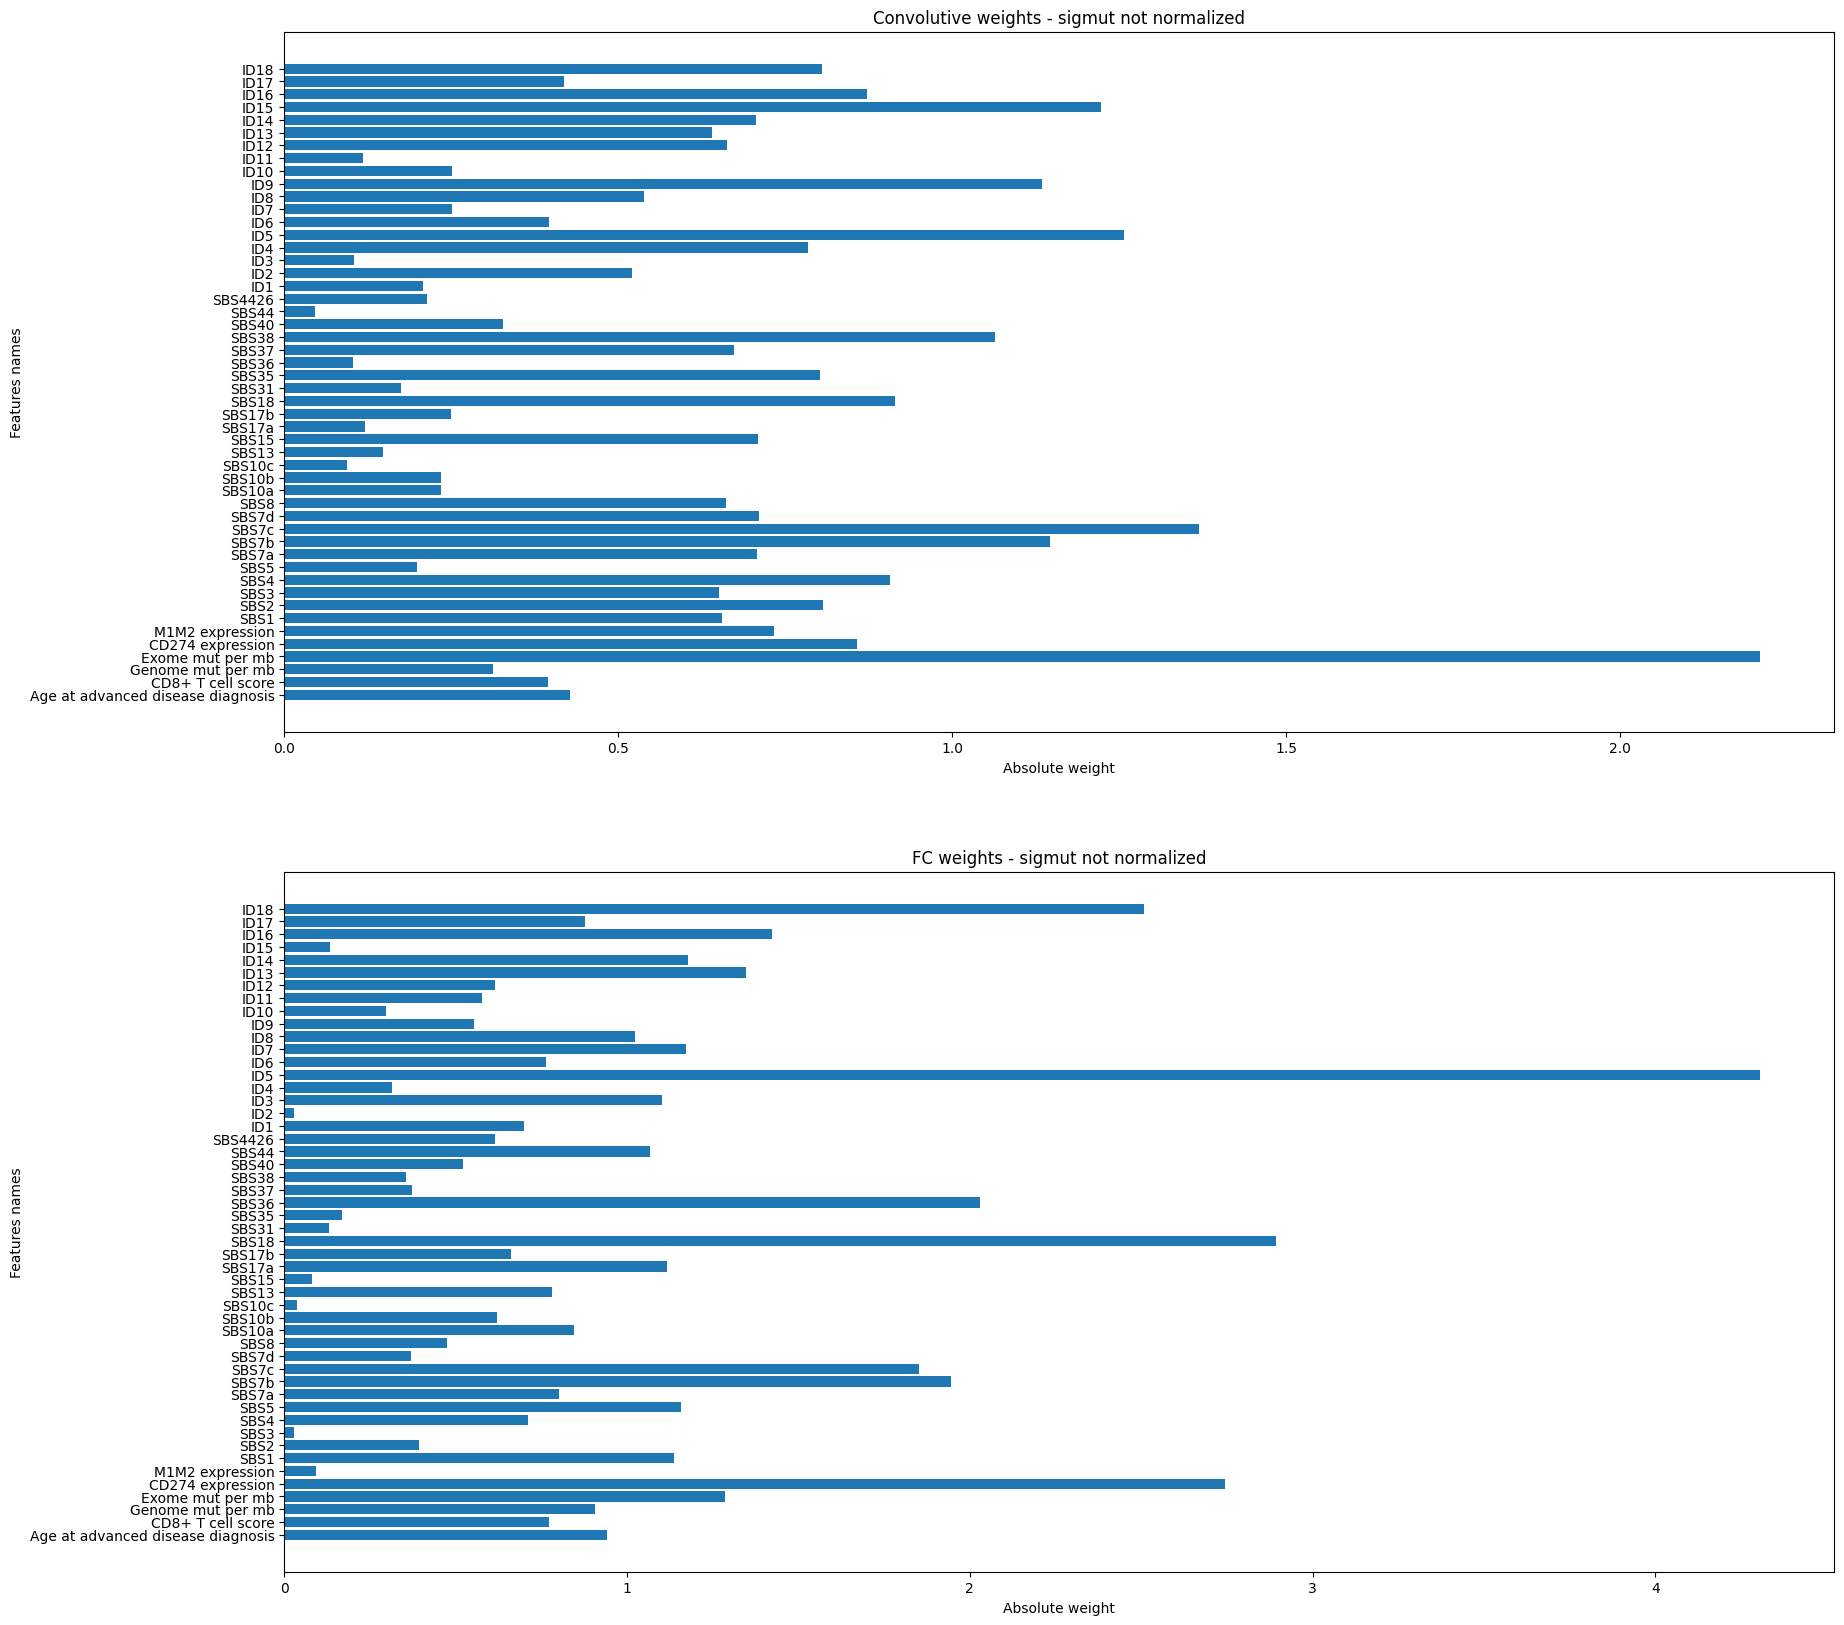

In [20]:
fig, ax = plt.subplots(2,1,figsize=(20,20))

ax[0].barh(features_name_sigmut,weights_conv)
ax[0].set_ylabel("Features names")
ax[0].set_xlabel("Absolute weight")
ax[0].set_title("Convolutive weights - sigmut not normalized")

ax[1].barh(features_name_sigmut,weights_linear)
ax[1].set_ylabel("Features names")
ax[1].set_xlabel("Absolute weight")
ax[1].set_title("FC weights - sigmut not normalized")